In [1]:
# my_notebook.ipynb

import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:


# Load the saved CSV file into a new DataFrame
new_df = pd.read_csv('C:\\Users\\Nole\\Desktop\\Teleco\\Notebook\\Cleaned_data_csv\\cleaned_data.csv')

# Now you can use the new_df DataFrame for further analysis in pandas


In [335]:
new_df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (B

In [336]:
new_df.shape

(146891, 47)

In [337]:
# Calculate the percentage of null values in each column
null_percentage = new_df.isnull().mean() * 100

# Display the null percentage for each column
null_percentage


Bearer Id                         0.0
Start                             0.0
Start ms                          0.0
End                               0.0
End ms                            0.0
Dur. (ms)                         0.0
IMSI                              0.0
MSISDN/Number                     0.0
IMEI                              0.0
Last Location Name                0.0
Avg RTT DL (ms)                   0.0
Avg RTT UL (ms)                   0.0
Avg Bearer TP DL (kbps)           0.0
Avg Bearer TP UL (kbps)           0.0
TCP DL Retrans. Vol (Bytes)       0.0
TCP UL Retrans. Vol (Bytes)       0.0
DL TP < 50 Kbps (%)               0.0
50 Kbps < DL TP < 250 Kbps (%)    0.0
250 Kbps < DL TP < 1 Mbps (%)     0.0
DL TP > 1 Mbps (%)                0.0
UL TP < 10 Kbps (%)               0.0
10 Kbps < UL TP < 50 Kbps (%)     0.0
50 Kbps < UL TP < 300 Kbps (%)    0.0
UL TP > 300 Kbps (%)              0.0
Activity Duration DL (ms)         0.0
Activity Duration UL (ms)         0.0
Dur. (ms).1 

In [338]:
# Assuming df is your DataFrame
dispersion_parameters = new_df.describe()
dispersion_parameters

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.468910e+05,146891.000000,146891.000000,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,146891.000000,146891.000000,146891.000000,...,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05
mean,1.014458e+19,499.117189,498.654397,1.052299e+05,2.082017e+14,3.596855e+10,4.844173e+13,100.444275,17.370302,13419.455991,...,1.163341e+07,1.100858e+07,1.162650e+07,1.100286e+07,4.220649e+08,8.290257e+06,4.210038e+08,8.262887e+06,4.112139e+07,4.546628e+08
std,2.892813e+18,288.554839,288.073522,8.092446e+04,1.334711e+09,8.792026e+11,2.238835e+13,548.571102,89.706711,24081.550773,...,6.710450e+06,6.345243e+06,6.724904e+06,6.357359e+06,2.440381e+08,4.781553e+06,2.431448e+08,4.768594e+06,1.127775e+07,2.442080e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.082001e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.852700e+04,2.082014e+14,3.365128e+10,3.546071e+13,31.000000,2.000000,43.000000,...,5.833512e+06,5.516549e+06,5.776626e+06,5.480202e+06,2.103941e+08,4.132622e+06,2.101527e+08,4.144489e+06,3.321835e+07,2.430767e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366369e+10,3.572181e+13,44.000000,5.000000,64.000000,...,1.161638e+07,1.101329e+07,1.164271e+07,1.099939e+07,4.234929e+08,8.294516e+06,4.216332e+08,8.265817e+06,4.114253e+07,4.559702e+08
75%,1.304243e+19,749.000000,750.000000,1.331545e+05,2.082018e+14,3.368344e+10,8.611970e+13,67.000000,13.000000,20023.500000,...,1.744064e+07,1.651411e+07,1.747017e+07,1.650352e+07,6.333301e+08,1.243239e+07,6.313683e+08,1.238204e+07,4.903488e+07,6.657831e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.082099e+14,3.370000e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


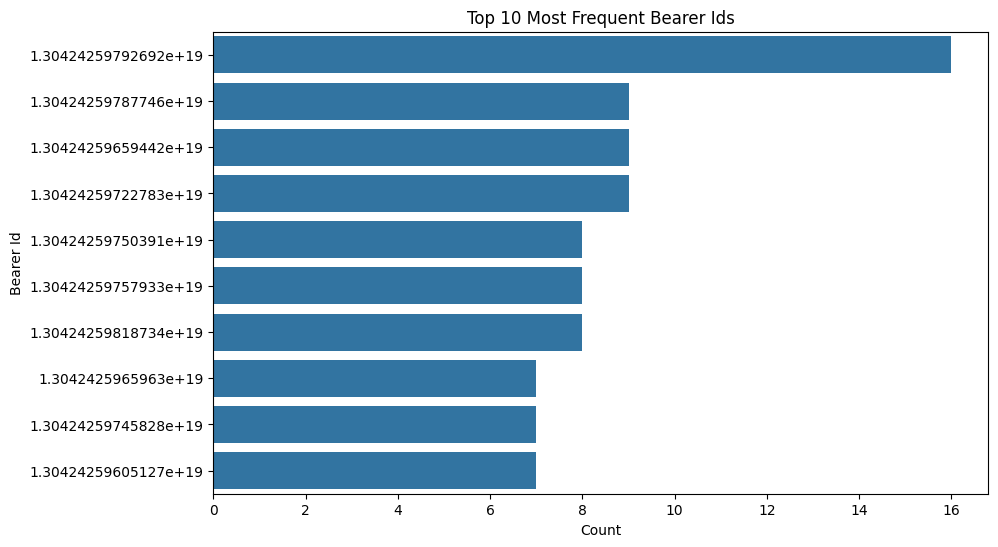

In [339]:


# Select the top 10 most frequent Bearer Ids
top_bearer_ids = new_df['Bearer Id'].value_counts().head(10)

# Create a count plot for the top 10 Bearer Ids
plt.figure(figsize=(10, 6))
sns.countplot(y='Bearer Id', data=new_df, order=top_bearer_ids.index)
plt.title('Top 10 Most Frequent Bearer Ids')
plt.xlabel('Count')
plt.ylabel('Bearer Id')
plt.show()


In [340]:
new_df.shape

(146891, 47)

# [TASK 2.2]

# Bivariate Analysis 

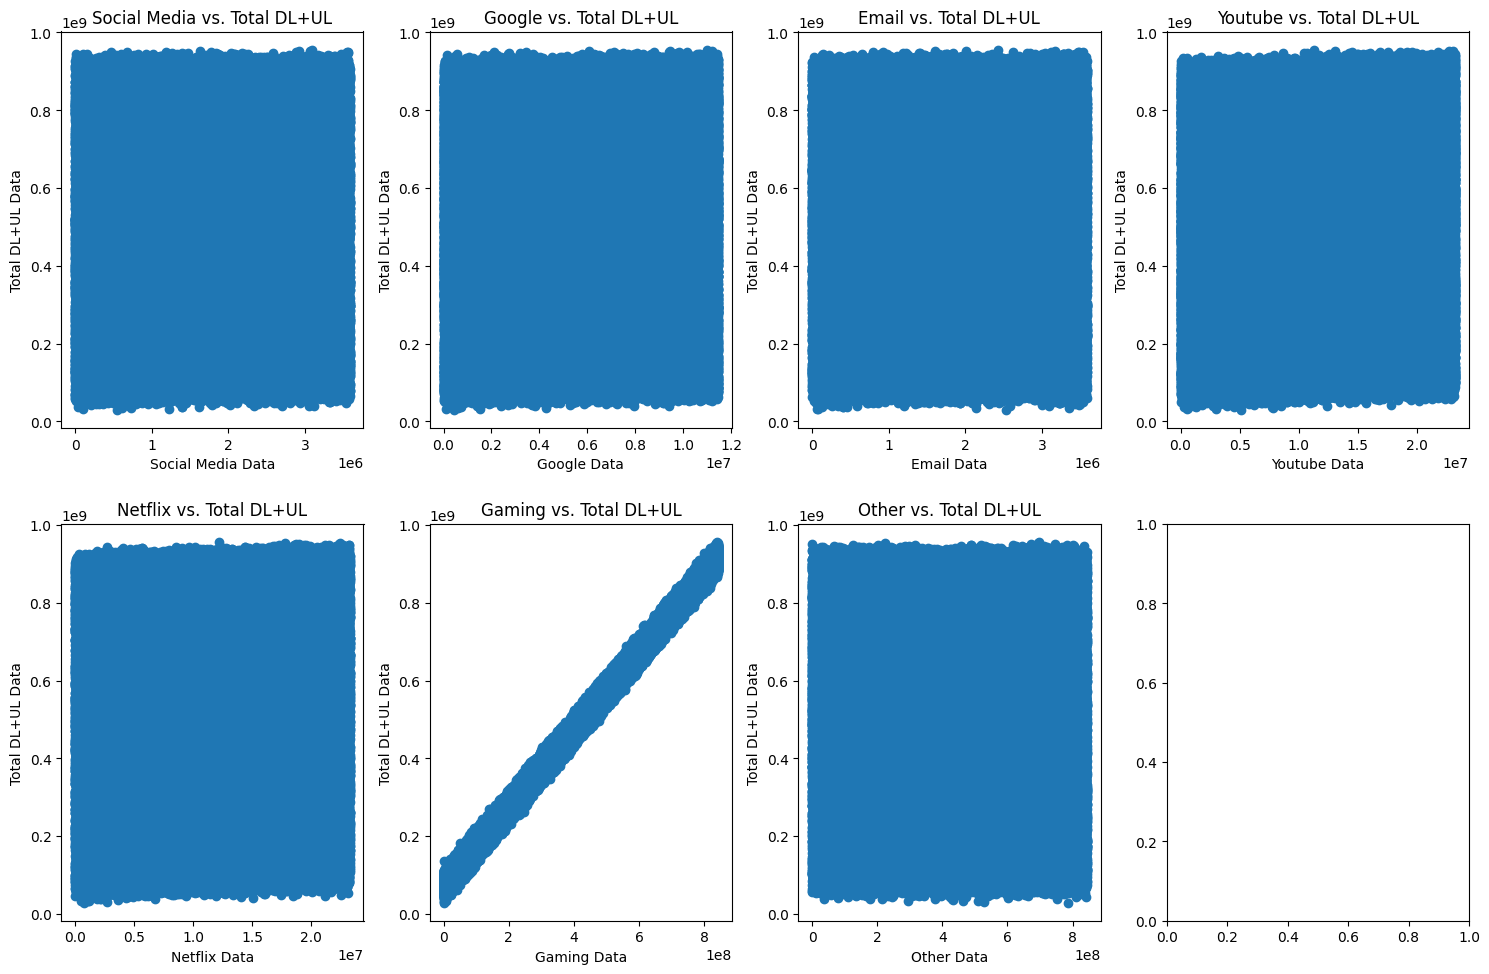

                         Social Media DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)                 1.000000          -0.002067   
Google DL (Bytes)                      -0.002067           1.000000   
Email DL (Bytes)                        0.004949           0.000370   
Youtube DL (Bytes)                     -0.001489           0.001679   
Netflix DL (Bytes)                     -0.001866           0.000774   
Gaming DL (Bytes)                       0.001835          -0.001266   
Other DL (Bytes)                        0.005589          -0.002204   
Total DL (Bytes)                        0.005974           0.012348   
Total UL (Bytes)                        0.005463          -0.001400   

                         Email DL (Bytes)  Youtube DL (Bytes)  \
Social Media DL (Bytes)          0.004949           -0.001489   
Google DL (Bytes)                0.000370            0.001679   
Email DL (Bytes)                 1.000000            0.001447   
Youtube DL (Bytes)           

In [345]:


# List of application columns
application_columns = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']

# Create scatter plots for each application vs. Total DL+UL data
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axes = axes.flatten()

for i, app in enumerate(application_columns):
    ax = axes[i]
    ax.scatter(new_df[f'{app} DL (Bytes)'], new_df['Total DL (Bytes)'] + new_df['Total UL (Bytes)'])
    ax.set_title(f'{app} vs. Total DL+UL')
    ax.set_xlabel(f'{app} Data')
    ax.set_ylabel('Total DL+UL Data')

plt.tight_layout()
plt.show()

# Calculate correlation coefficients
correlation_matrix = new_df[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)', 'Total DL (Bytes)', 'Total UL (Bytes)']].corr()
print(correlation_matrix)


# variable transformation  on the total duration for all sessions

In [376]:


# Calculate the total duration for all sessions for each user
user_total_duration = new_df.groupby('IMSI')['Dur. (ms)'].sum().reset_index(name='Total Duration')

# Segment the users into decile classes based on the total duration
user_total_duration['Total Duration Decile'] = pd.qcut(user_total_duration['Total Duration'], q=5, labels=False)

# Assign decile class labels to the users
top_decile_classes = user_total_duration['Total Duration Decile'].nunique() - 5
top_deciles = user_total_duration[user_total_duration['Total Duration Decile'] >= top_decile_classes]

# Display the users in the top five decile classes
print(top_deciles)


                IMSI  Total Duration  Total Duration Decile
0       2.082001e+14         86019.0                      1
1       2.082001e+14         86254.0                      1
2       2.082001e+14        573923.0                      4
3       2.082001e+14         13835.0                      0
4       2.082001e+14        372454.0                      4
...              ...             ...                    ...
105713  2.082099e+14         93682.0                      2
105714  2.082099e+14       3487595.0                      4
105715  2.082099e+14        127367.0                      2
105716  2.082099e+14        168543.0                      3
105717  2.082099e+14         86399.0                      1

[105718 rows x 3 columns]


# variable transformation  on compute the total data (DL+UL) per decile class. 


In [378]:

# Calculate the total duration for all sessions for each user
user_total_duration = new_df.groupby('IMSI')['Dur. (ms)'].sum().reset_index(name='Total Duration')

# Segment the users into decile classes based on the total duration
user_total_duration['Total Duration Decile'] = pd.qcut(user_total_duration['Total Duration'], q=10, labels=False)

# Merge the total duration decile class back to the original DataFrame
new_df = pd.merge(new_df, user_total_duration[['IMSI', 'Total Duration Decile']], on='IMSI', how='left', suffixes=('', '_total'))

# Calculate the total data (DL+UL) per session
new_df['Total Data (DL+UL)'] = new_df['Total DL (Bytes)'] + new_df['Total UL (Bytes)']

# Compute the total data (DL+UL) per decile class
total_data_per_decile = new_df.groupby('Total Duration Decile')['Total Data (DL+UL)'].sum()
print(total_data_per_decile)



Total Duration Decile
0    1.142989e+13
1    1.227079e+13
2    1.156726e+13
3    1.377453e+13
4    2.378375e+13
Name: Total Data (DL+UL), dtype: float64


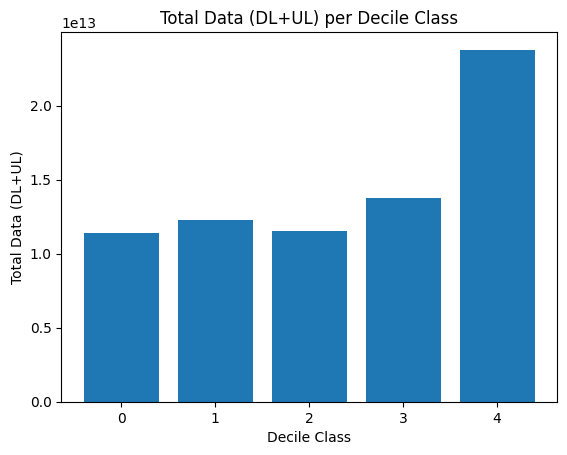

In [379]:


# Calculate the total duration for all sessions for each user
user_total_duration = new_df.groupby('IMSI')['Dur. (ms)'].sum().reset_index(name='Total Duration')

# Segment the users into decile classes based on the total duration
user_total_duration['Total Duration Decile'] = pd.qcut(user_total_duration['Total Duration'], q=10, labels=False)

# Merge the total duration decile class back to the original DataFrame
new_df = pd.merge(new_df, user_total_duration[['IMSI', 'Total Duration Decile']], on='IMSI', how='left', suffixes=('', '_total'))

# Calculate the total data (DL+UL) per session
new_df['Total Data (DL+UL)'] = new_df['Total DL (Bytes)'] + new_df['Total UL (Bytes)']

# Compute the total data (DL+UL) per decile class
total_data_per_decile = new_df.groupby('Total Duration Decile')['Total Data (DL+UL)'].sum()

# Plotting the graph
plt.bar(total_data_per_decile.index, total_data_per_decile.values)
plt.xlabel('Decile Class')
plt.ylabel('Total Data (DL+UL)')
plt.title('Total Data (DL+UL) per Decile Class')
plt.show()


In [380]:


# Calculate the total duration for all sessions for each user
user_total_duration = new_df.groupby('IMSI')['Dur. (ms)'].sum().reset_index(name='Total Duration')

# Segment the users into decile classes based on the total duration
user_total_duration['Total Duration Decile'] = pd.qcut(user_total_duration['Total Duration'], q=10, labels=False)

# Merge the total duration decile class back to the original DataFrame
new_df = pd.merge(new_df, user_total_duration[['IMSI', 'Total Duration Decile']], on='IMSI', how='left', suffixes=('', '_total'))

# Calculate the total data (DL+UL) per session
new_df['Total Data (DL+UL)'] = new_df['Total DL (Bytes)'] + new_df['Total UL (Bytes)']

# Compute the total data (DL+UL) per decile class
total_data_per_decile = new_df.groupby('Total Duration Decile')['Total Data (DL+UL)'].sum()

# Compute the total duration per decile class
total_duration_per_decile = user_total_duration.groupby('Total Duration Decile')['Total Duration'].sum()

# Calculate the correlation between total data per decile and total duration per decile
correlation = total_data_per_decile.corr(total_duration_per_decile)

print(f"Correlation between total data per decile and total duration per decile: {correlation:.2f}")

Correlation between total data per decile and total duration per decile: 0.49


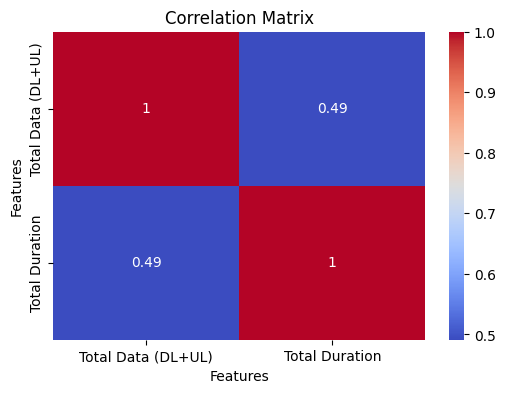

In [381]:


# Create a DataFrame with the two columns
corr_data = pd.DataFrame({'Total Data (DL+UL)': total_data_per_decile, 'Total Duration': total_duration_per_decile})

# Calculate the correlation matrix
corr_matrix = corr_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title and labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Display the plot
plt.show()

# correlation 

In [346]:
# Compute a correlation matrix for the specified variables
correlation_matrix = new_df[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']].corr()
correlation_matrix


,Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes)
Social Media DL (Bytes),1.000000,-0.002067,0.004949,-0.001489,-0.001866,0.001835,0.005589
Google DL (Bytes),-0.002067,1.000000,0.000370,0.001679,0.000774,-0.001266,-0.002204
Email DL (Bytes),0.004949,0.000370,1.000000,0.001447,0.001455,0.000662,-0.000022
Youtube DL (Bytes),-0.001489,0.001679,0.001447,1.000000,0.001383,-0.002335,0.002021
Netflix DL (Bytes),-0.001866,0.000774,0.001455,0.001383,1.000000,-0.003725,-0.004755
Gaming DL (Bytes),0.001835,-0.001266,0.000662,-0.002335,-0.003725,1.000000,-0.002743
Other DL (Bytes),0.005589,-0.002204,-0.000022,0.002021,-0.004755,-0.002743,1.000000


# dimentionality reduction

# The explained variance ratio indicates the proportion of the dataset's variance that is explained by each principal component. A higher explained variance ratio suggests that the corresponding principal component captures a larger amount of information from the original data.

# The first principal component (PC1) captures the direction in the data that has the highest variance. It represents the most significant patterns in the original data.

# The second principal component (PC2) captures the direction with the second highest variance, and it is orthogonal to the first principal component. It represents additional patterns that are not captured by the first principal component.---

In [349]:
from sklearn.decomposition import PCA

# Select the columns for PCA
pca_columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']

# Create the PCA model
pca = PCA(n_components=2)  # Choose the number of components
principal_components = pca.fit_transform(new_df[pca_columns])

# Interpretation of the results
# The explained variance ratio provides the amount of variance explained by each of the selected components
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# You can also access the principal components themselves
principal_components_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Print the principal components dataframe
print(principal_components_df.head())


Explained Variance Ratio: [0.50185269 0.49727719]
            PC1           PC2
0  5.795543e+07  2.819608e+08
1 -1.437196e+08 -1.594065e+08
2  1.793892e+08  7.053327e+07
3 -2.546487e+08 -4.304035e+08
4 -5.930620e+07 -1.564172e+08


# Task 3 - User Engagement analysis

# using the following engagement metrics: sessions frequency , the duration of the session , the sessions total traffic (download and upload (bytes))


In [ ]:
# sessions frequency 

In [384]:
new_df['session frequency'] = new_df['Avg RTT DL (ms)'] + new_df['Avg RTT UL (ms)']
new_df['session frequency']

0          47.0
1          70.0
2          70.0
3          70.0
4          70.0
          ...  
146886    322.0
146887     32.0
146888     29.0
146889     49.0
146890     42.0
Name: session frequency, Length: 146891, dtype: float64

# sessions total traffic

In [386]:
new_df['session total traffic'] = new_df['Total DL (Bytes)'] + new_df['Total UL (Bytes)']
new_df['session total traffic']

0         345629377.0
1         707185356.0
2         307690973.0
3         889352748.0
4         607681403.0
             ...     
146886    872761860.0
146887    631804110.0
146888    705783925.0
146889    627698629.0
146890    401522016.0
Name: session total traffic, Length: 146891, dtype: float64

# to give equal weight to each engagement metrics and ensure that extreme values in one metric don't dominate the overall score, then using the mean is a better approach.

In [393]:
# Assuming user_engagement_table is your DataFrame
new_df['mean_engagement'] = new_df[['session total traffic', 'session frequency', 'Dur. (ms)']].mean(axis=1)




# create a table 

In [405]:

user_engagement_columns = new_df[['MSISDN/Number', 'session frequency', 'Dur. (ms)', 'Total UL (Bytes)','session total traffic' , 'mean_engagement']]
user_engagement_table = user_engagement_columns.copy()
user_engagement_table


,MSISDN/Number,session frequency,Dur. (ms),Total UL (Bytes),session total traffic,mean_engagement
0,3.366496e+10,47.0,1823652.0,36749741.0,345629377.0,1.158177e+08
1,3.368185e+10,70.0,1365104.0,53800391.0,707185356.0,2.361835e+08
2,3.376063e+10,70.0,1361762.0,27883638.0,307690973.0,1.030176e+08
3,3.375034e+10,70.0,1321509.0,43324218.0,889352748.0,2.968914e+08
4,3.369980e+10,70.0,1089009.0,38542814.0,607681403.0,2.029235e+08
...,...,...,...,...,...,...
146886,3.366865e+10,322.0,59587.0,53745392.0,872761860.0,2.909406e+08
146887,3.365069e+10,32.0,81230.0,57628851.0,631804110.0,2.106285e+08
146888,3.366345e+10,29.0,97970.0,39135081.0,705783925.0,2.352940e+08
146889,3.362189e+10,49.0,98249.0,34912224.0,627698629.0,2.092656e+08


In [406]:
top_10_engagement = user_engagement_table.nlargest(10, 'mean_engagement')
top_10_engagement


,MSISDN/Number,session frequency,Dur. (ms),Total UL (Bytes),session total traffic,mean_engagement
50737,3.367492e+10,43.0,220580.0,75112879.0,955984776.0,3.187351e+08
136896,3.366469e+10,348.0,86400.0,63147039.0,952641334.0,3.175760e+08
65259,3.366855e+10,332.0,86400.0,57766252.0,952307464.0,3.174647e+08
75160,3.365881e+10,84.0,86400.0,56303507.0,951775502.0,3.172873e+08
106064,3.366783e+10,49.0,146623.0,60872436.0,950760661.0,3.169691e+08
59543,3.361083e+10,17.0,100129.0,59581185.0,949987157.0,3.166958e+08
5289,3.360667e+10,84.0,50375.0,59462396.0,949598255.0,3.165496e+08
49532,3.366205e+10,39.0,275548.0,65071313.0,949172538.0,3.164827e+08
117172,3.366261e+10,52.0,86399.0,56908106.0,949292055.0,3.164595e+08
144858,3.366853e+10,53.0,92773.0,50811516.0,948809765.0,3.163009e+08


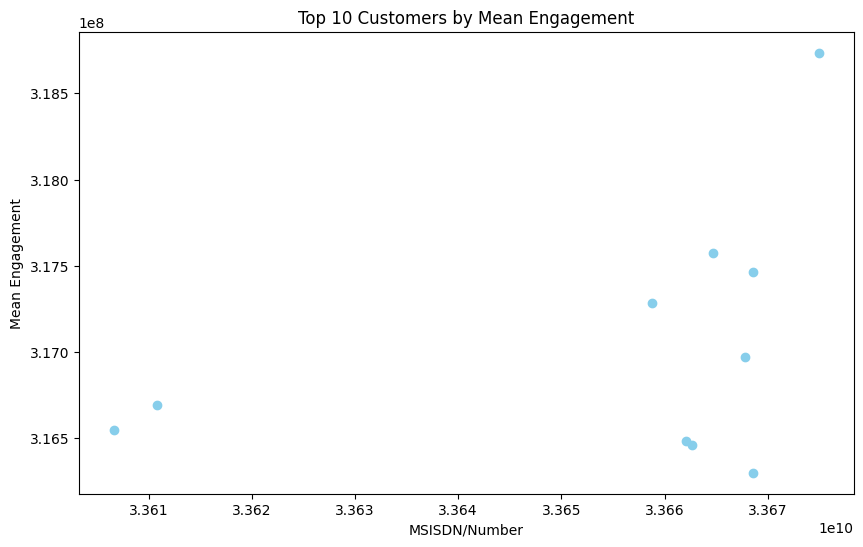

In [399]:


# Assuming top_10_engagement contains the top 10 customers based on mean_engagement
plt.figure(figsize=(10, 6))
plt.scatter(top_10_engagement['MSISDN/Number'], top_10_engagement['mean_engagement'], color='skyblue')
plt.xlabel('MSISDN/Number')
plt.ylabel('Mean Engagement')
plt.title('Top 10 Customers by Mean Engagement')
plt.show()


# clustering

In [462]:
from sklearn.preprocessing import MinMaxScaler
engagement_metrics = user_engagement_table[['session total traffic', 'session frequency', 'Dur. (ms)']]

# Normalize the engagement metrics
scaler = MinMaxScaler()
normalized_engagement = scaler.fit_transform(engagement_metrics)

# Run k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
user_engagement_table['engagement_group'] = kmeans.fit_predict(normalized_engagement)
user_engagement_table


,MSISDN/Number,session frequency,Dur. (ms),Total UL (Bytes),session total traffic,mean_engagement,engagement_group
0,3.366496e+10,47.0,1823652.0,36749741.0,345629377.0,1.158177e+08,1
1,3.368185e+10,70.0,1365104.0,53800391.0,707185356.0,2.361835e+08,2
2,3.376063e+10,70.0,1361762.0,27883638.0,307690973.0,1.030176e+08,1
3,3.375034e+10,70.0,1321509.0,43324218.0,889352748.0,2.968914e+08,2
4,3.369980e+10,70.0,1089009.0,38542814.0,607681403.0,2.029235e+08,0
...,...,...,...,...,...,...,...
146886,3.366865e+10,322.0,59587.0,53745392.0,872761860.0,2.909406e+08,2
146887,3.365069e+10,32.0,81230.0,57628851.0,631804110.0,2.106285e+08,0
146888,3.366345e+10,29.0,97970.0,39135081.0,705783925.0,2.352940e+08,2
146889,3.362189e+10,49.0,98249.0,34912224.0,627698629.0,2.092656e+08,0


In [463]:
user_engagement_table['engagement_group'].value_counts()

engagement_group
1    49225
0    49155
2    48511
Name: count, dtype: int64

In [464]:
# Merge cluster assignments with the original DataFrame
clustered_data = user_engagement_table.copy()  # Create a copy of the DataFrame
clustered_data['cluster'] = kmeans.labels_  # Add the cluster assignments to the DataFrame

# Group the data by the cluster assignments
cluster_groups = clustered_data.groupby('cluster')

# Compute the minimum, maximum, average, and total non-normalized metrics for each cluster
cluster_summary = cluster_groups.agg({
    'session total traffic': ['min', 'max', 'mean', 'sum'],
    'session frequency': ['min', 'max', 'mean', 'sum'],
    'Dur. (ms)': ['min', 'max', 'mean', 'sum']
    
})
cluster_summary


session total traffic                                           \
                          min          max          mean           sum   
cluster                                                                  
0                 356783538.0  639234097.0  4.983211e+08  2.449497e+13   
1                  28956107.0  356864365.0  2.141585e+08  1.054195e+13   
2                 639246733.0  955984776.0  7.789843e+08  3.778931e+13   

        session frequency                                 Dur. (ms)  \
                      min      max        mean        sum       min   
cluster                                                               
0                     0.0  25922.0  117.515532  5776476.0    7142.0   
1                     0.0  96924.0  118.492494  5832793.0    7189.0   
2                     0.0  64641.0  117.429696  5696632.0    7146.0   

                                                 
               max           mean           sum  
cluster                                          
0        1772931.0  105428.786675  5.182352e+09  
1        1859336.0  105082.083616  5.172666e+09  
2        1859327.0  105178.305663  5.102305e+09

In [465]:
# To interpret the results visually 

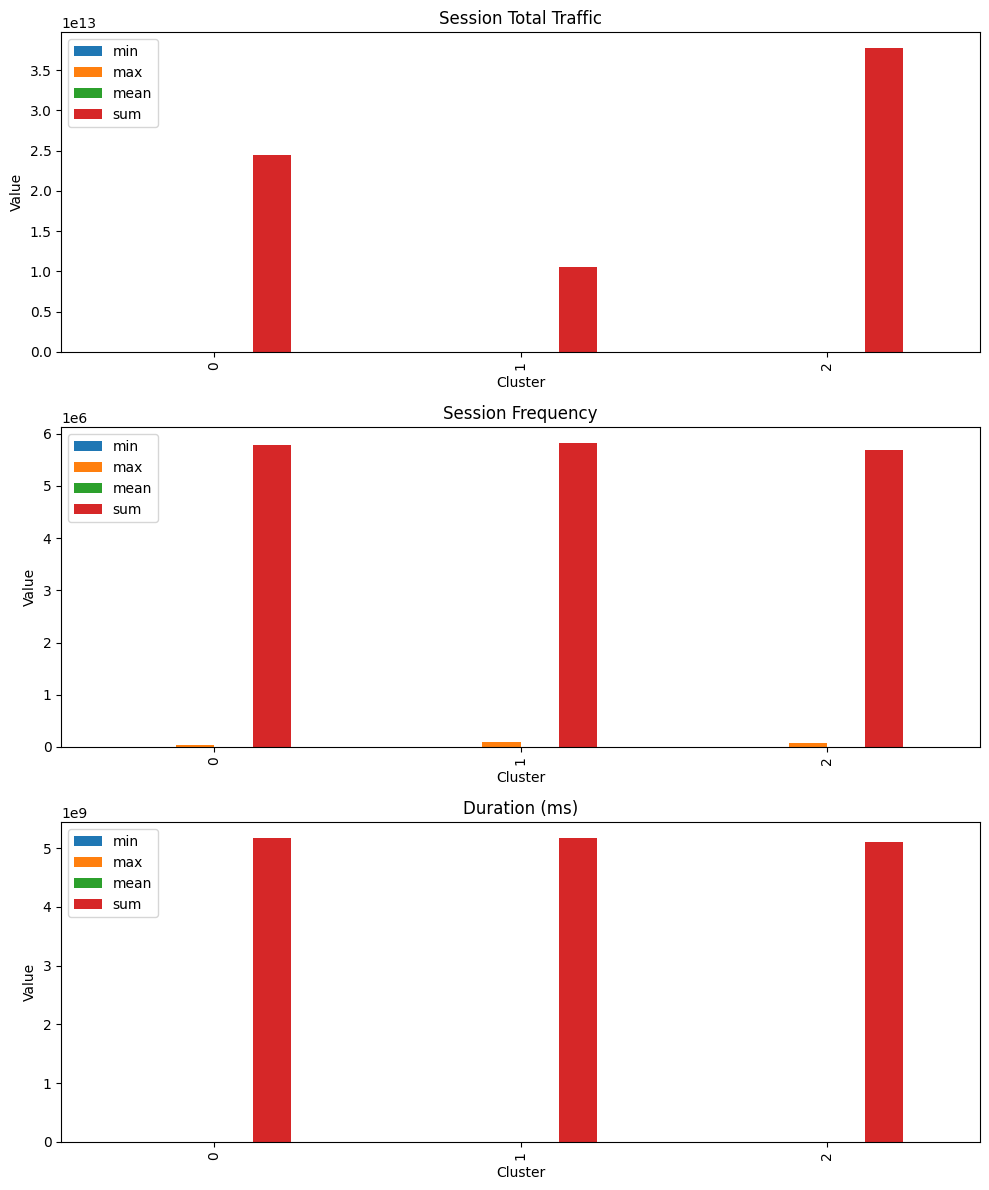

In [466]:


# Visualize the computed metrics for each cluster using bar charts
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

metrics = ['session total traffic', 'session frequency', 'Dur. (ms)']
titles = ['Session Total Traffic', 'Session Frequency', 'Duration (ms)']

for i, metric in enumerate(metrics):
    ax = axes[i]
    cluster_summary[metric].plot(kind='bar', ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()


# Compute the minimum, maximum, average & total non-normalized metrics for each cluster. 


In [467]:
# Compute the minimum, maximum, average, and total non-normalized metrics for each cluster
cluster_summary = cluster_groups.agg({
    'session total traffic': ['min', 'max', 'mean', 'sum'],
    'session frequency': ['min', 'max', 'mean', 'sum'],
    'Dur. (ms)': ['min', 'max', 'mean', 'sum']
})

# Display the computed metrics for each cluster
print(cluster_summary)


        session total traffic                                           \
                          min          max          mean           sum   
cluster                                                                  
0                 356783538.0  639234097.0  4.983211e+08  2.449497e+13   
1                  28956107.0  356864365.0  2.141585e+08  1.054195e+13   
2                 639246733.0  955984776.0  7.789843e+08  3.778931e+13   

        session frequency                                 Dur. (ms)  \
                      min      max        mean        sum       min   
cluster                                                               
0                     0.0  25922.0  117.515532  5776476.0    7142.0   
1                     0.0  96924.0  118.492494  5832793.0    7189.0   
2                     0.0  64641.0  117.429696  5696632.0    7146.0   

                                                 
               max           mean           sum  
cluster                     

#  and Interpret the results visually with accompanying text.

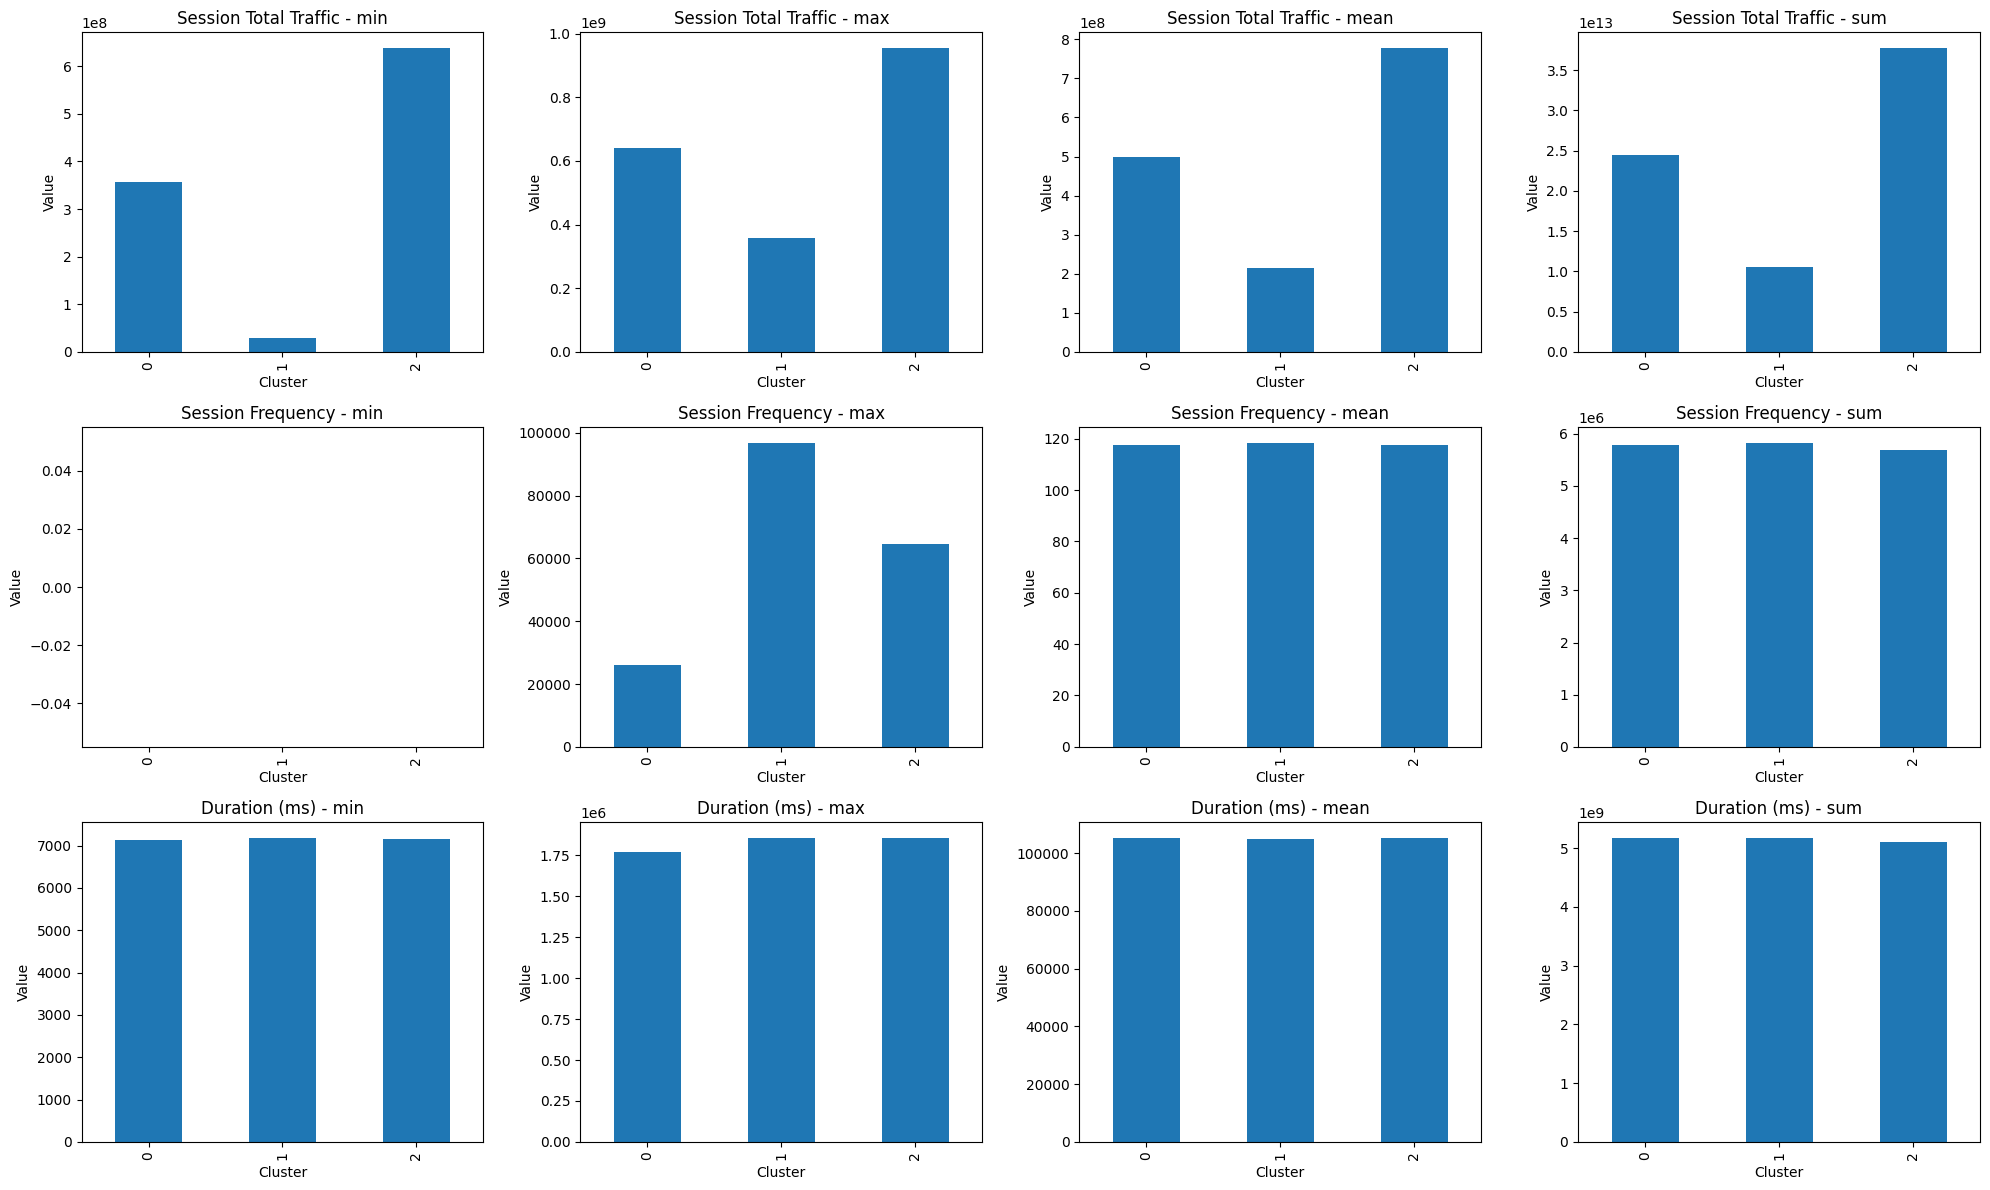

In [468]:


# Visualize the computed metrics for each cluster using bar charts
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))

metrics = ['session total traffic', 'session frequency', 'Dur. (ms)']
titles = ['Session Total Traffic', 'Session Frequency', 'Duration (ms)']
aggregations = ['min', 'max', 'mean', 'sum']

for i, metric in enumerate(metrics):
    for j, aggregation in enumerate(aggregations):
        ax = axes[i, j]
        cluster_summary[metric][aggregation].plot(kind='bar', ax=ax)
        ax.set_title(f'{titles[i]} - {aggregation}')
        ax.set_xlabel('Cluster')
        ax.set_ylabel('Value')

plt.tight_layout()
plt.show()


# user total traffic per application  

In [469]:
# Calculate the total traffic for each application
new_df['Social Media (Bytes)'] = new_df['Social Media DL (Bytes)'] + new_df['Social Media UL (Bytes)']
new_df['YouTube (Bytes)'] = new_df['Youtube DL (Bytes)'] + new_df['Youtube UL (Bytes)']
new_df['Netflix (Bytes)'] = new_df['Netflix DL (Bytes)'] + new_df['Netflix UL (Bytes)']
new_df['Google (Bytes)'] = new_df['Google DL (Bytes)'] + new_df['Google UL (Bytes)']
new_df['Email (Bytes)'] = new_df['Email DL (Bytes)'] + new_df['Email UL (Bytes)']
new_df['Gaming (Bytes)'] = new_df['Gaming DL (Bytes)'] + new_df['Gaming UL (Bytes)']
new_df['Other (Bytes)'] = new_df['Other DL (Bytes)'] + new_df['Other UL (Bytes)']

# Create a new table with the specified columns
app_traffic_summary = new_df[['MSISDN/Number', 
                              'Social Media (Bytes)', 
                              'YouTube (Bytes)', 
                              'Netflix (Bytes)', 
                              'Google (Bytes)', 
                              'Email (Bytes)', 
                              'Gaming (Bytes)', 
                              'Other (Bytes)']]
app_traffic_summary

,MSISDN/Number,Social Media (Bytes),YouTube (Bytes),Netflix (Bytes),Google (Bytes),Email (Bytes),Gaming (Bytes),Other (Bytes)
0,3.366496e+10,1570185.0,18355943.0,17855187.0,2905912.0,3701304.0,292426453.0,180558843.0
1,3.368185e+10,1933278.0,39359124.0,35565545.0,4414096.0,937385.0,609920783.0,541959383.0
2,3.376063e+10,1726277.0,34425237.0,23751202.0,10229119.0,3363124.0,229980251.0,414908351.0
3,3.375034e+10,657493.0,36534765.0,15092588.0,11811761.0,2070983.0,810387875.0,761837216.0
4,3.369980e+10,912788.0,34222253.0,17539799.0,7748843.0,2110349.0,531237049.0,564619822.0
...,...,...,...,...,...,...,...,...
146886,3.366865e+10,993175.0,24553645.0,29618711.0,1265634.0,4280107.0,797160102.0,336273648.0
146887,3.365069e+10,3517065.0,27955095.0,37561864.0,12784914.0,690876.0,535806880.0,16751926.0
146888,3.366345e+10,2352181.0,22165518.0,40643294.0,4415361.0,2121718.0,631628095.0,714638145.0
146889,3.362189e+10,1260239.0,24516413.0,15029702.0,6585469.0,2058277.0,566933800.0,132415585.0


# the 10 most engaged users per application

In [470]:
top_10_social_media_users = new_df.nlargest(10, 'Social Media (Bytes)')
top_10_youtube_users = new_df.nlargest(10, 'YouTube (Bytes)')
top_10_netflix_users = new_df.nlargest(10, 'Netflix (Bytes)')
top_10_google_users = new_df.nlargest(10, 'Google (Bytes)')
top_10_email_users = new_df.nlargest(10, 'Email (Bytes)')
top_10_gaming_users = new_df.nlargest(10, 'Gaming (Bytes)')
top_10_other_users = new_df.nlargest(10, 'Other (Bytes)')


# Plot the top 3 most used applications using appropriate charts.  

In [471]:
# Get the total usage for each application
total_usage = new_df[['Social Media (Bytes)', 'YouTube (Bytes)', 'Netflix (Bytes)', 'Google (Bytes)', 'Email (Bytes)', 'Gaming (Bytes)', 'Other (Bytes)']].sum()

# Get the top 3 most used applications
top_3_most_used = total_usage.nlargest(3)
print(top_3_most_used)


Gaming (Bytes)     6.321529e+13
Other (Bytes)      6.305541e+13
YouTube (Bytes)    3.325905e+12
dtype: float64


In [472]:
# plot the bar chart

In [473]:
new_df.shape

(146891, 65)

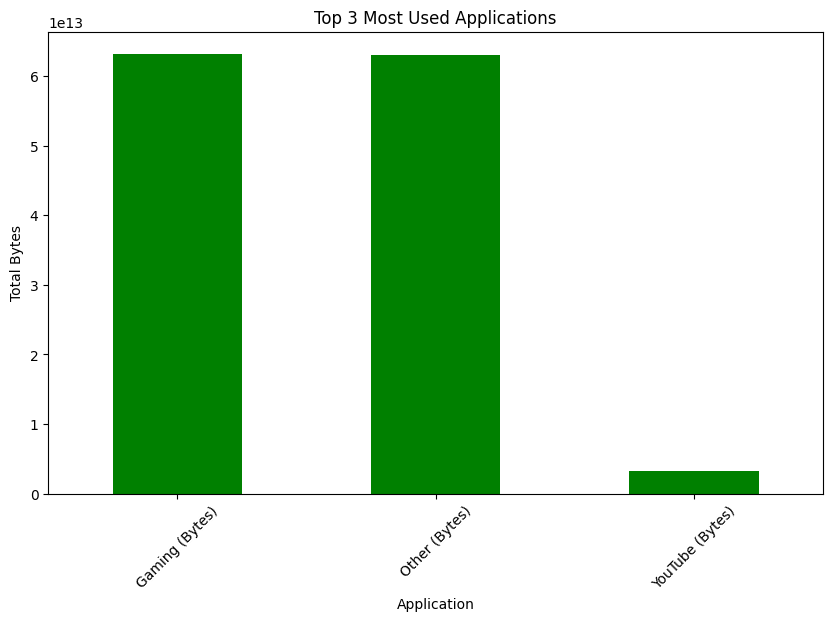

In [474]:
import matplotlib.pyplot as plt

# Get the total usage for each application
total_usage = new_df[['Social Media (Bytes)', 'YouTube (Bytes)', 'Netflix (Bytes)', 'Google (Bytes)', 'Email (Bytes)', 'Gaming (Bytes)', 'Other (Bytes)']].sum()

# Get the top 3 most used applications
top_3_most_used = total_usage.nlargest(3)

# Create a bar chart for the top 3 most used applications
plt.figure(figsize=(10, 6))
top_3_most_used.plot(kind='bar', color='green')
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application')
plt.ylabel('Total Bytes')
plt.xticks(rotation=45)
plt.show()


# Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 

# the optimized value of k (use elbow method for this)?  

In [488]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the engagement metrics
engagement_metrics_normalized = scaler.fit_transform(engagement_metrics)

engagement_metrics_normalized


array([[3.41600298e-01, 4.84916017e-04, 9.80734200e-01],
       [7.31616261e-01, 7.22215344e-04, 7.33164021e-01],
       [3.00675562e-01, 7.22215344e-04, 7.31359674e-01],
       ...,
       [7.30104516e-01, 2.99203500e-04, 4.90380597e-02],
       [6.45872714e-01, 5.05550741e-04, 4.91886919e-02],
       [4.01892543e-01, 4.33329206e-04, 4.90056657e-02]])

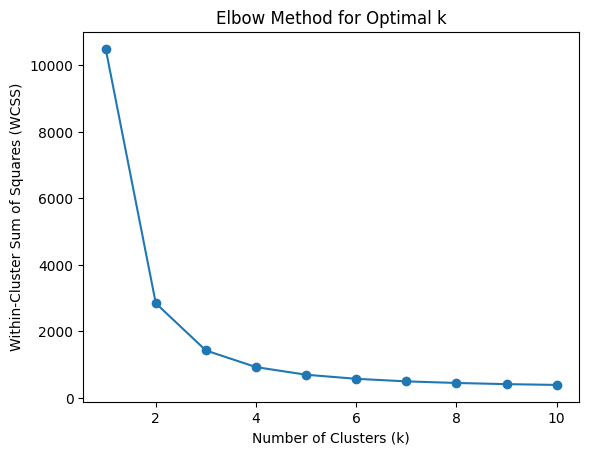

In [495]:
import matplotlib.pyplot as plt

# Initialize an empty list to store the values of the within-cluster sum of squares (WCSS)
wcss = []

# Specify a range of k values to test
k_values = range(1, 11)  # You can adjust the range based on your specific requirements

# Calculate the WCSS for different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(engagement_metrics_normalized)
    wcss.append(kmeans.inertia_)

# Plot the WCSS for different values of k
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


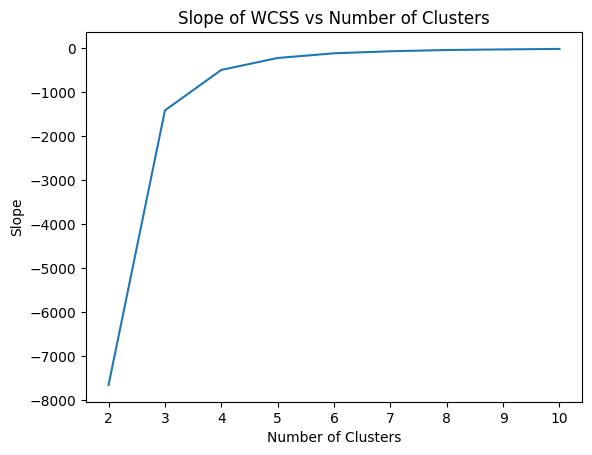

In [502]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Assuming X is your data

# Calculate WCSS for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(engagement_metrics_normalized)
    wcss.append(kmeans.inertia_)

# Calculate slopes
slopes = []
for i in range(1, len(wcss)):
    slope = (wcss[i] - wcss[i-1]) / (i - (i-1))
    slopes.append(slope)

# Plot the slopes
plt.plot(range(2, 11), slopes)
plt.title('Slope of WCSS vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Slope')
plt.show()


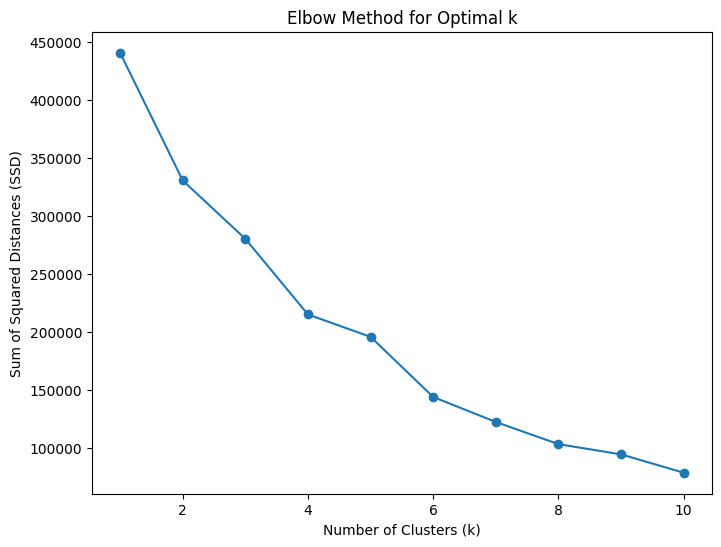

In [480]:

# Select relevant engagement metrics for clustering
engagement_metrics = new_df[['session total traffic', 'session frequency', 'Dur. (ms)']]

# Standardize the engagement metrics
scaler = StandardScaler()
engagement_metrics_standardized = scaler.fit_transform(engagement_metrics)

# Initialize a range of k values
k_values = range(1, 11)  # Assuming a range from 1 to 10 for example

# Fit the k-means algorithm for each k and calculate the sum of squared distances
ssd = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(engagement_metrics_standardized)
    ssd.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, ssd, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.show()


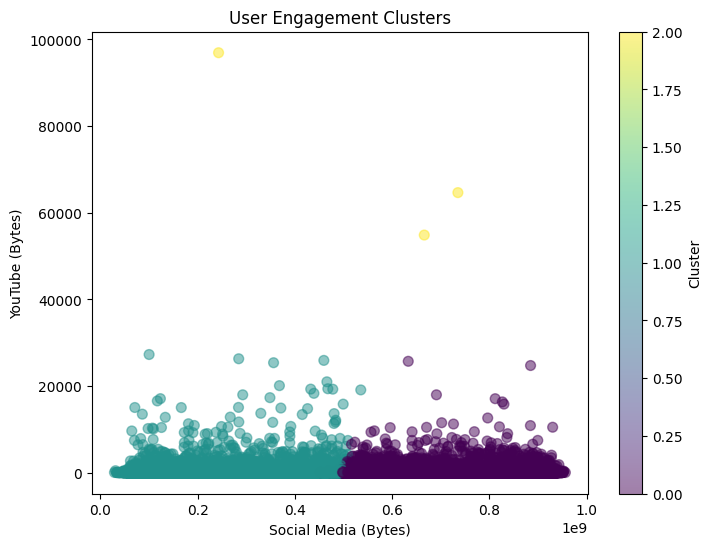

In [481]:

X = new_df['session total traffic']
Y = new_df['session frequency']

# Visualize the clusters in a 2D scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('User Engagement Clusters')
plt.xlabel('Social Media (Bytes)')
plt.ylabel('YouTube (Bytes)')
plt.colorbar(label='Cluster')
plt.show()


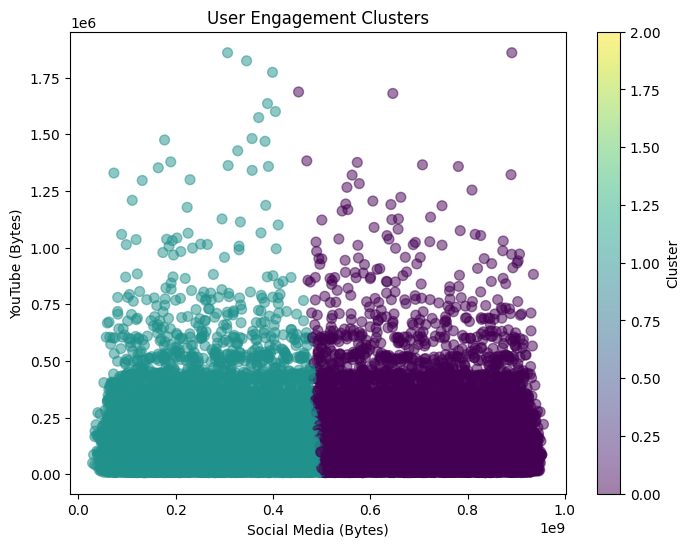

In [482]:

X = new_df['session total traffic']
Y = new_df['Dur. (ms)']

# Visualize the clusters in a 2D scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('User Engagement Clusters')
plt.xlabel('Social Media (Bytes)')
plt.ylabel('YouTube (Bytes)')
plt.colorbar(label='Cluster')
plt.show()

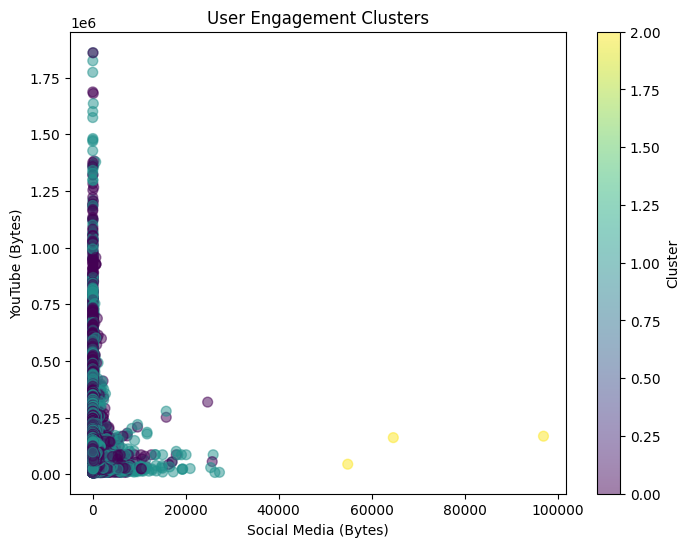

In [483]:
X = new_df['session frequency']
Y = new_df['Dur. (ms)']

# Visualize the clusters in a 2D scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('User Engagement Clusters')
plt.xlabel('Social Media (Bytes)')
plt.ylabel('YouTube (Bytes)')
plt.colorbar(label='Cluster')
plt.show()

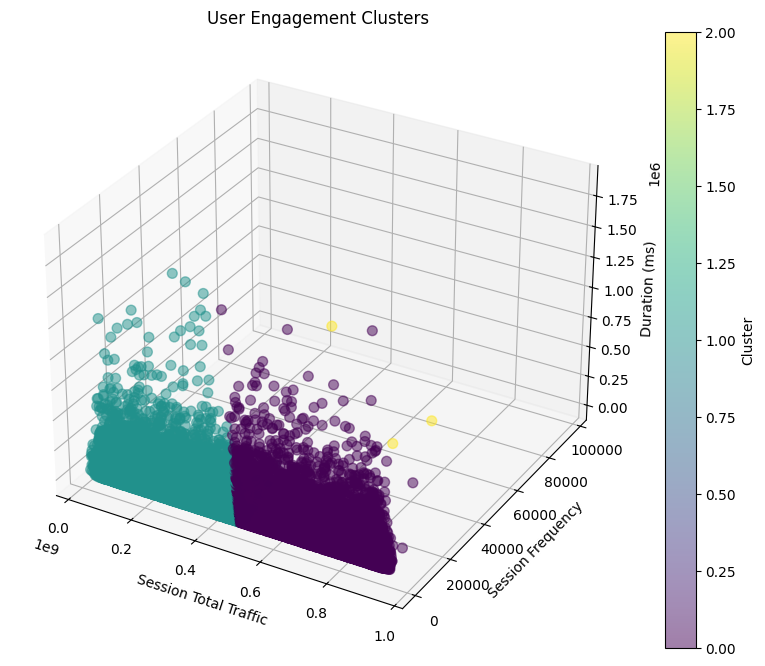

In [484]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'session total traffic', 'session frequency', and 'Dur. (ms)' are used as features for clustering
X = new_df['session total traffic']
Y = new_df['session frequency']
Z = new_df['Dur. (ms)']

# Visualize the clusters in a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X, Y, Z, c=cluster_labels, cmap='viridis', s=50, alpha=0.5)

ax.set_title('User Engagement Clusters')
ax.set_xlabel('Session Total Traffic')
ax.set_ylabel('Session Frequency')
ax.set_zlabel('Duration (ms)')
plt.colorbar(scatter, label='Cluster')

plt.show()
